In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
iris = load_iris()

In [5]:
data = iris.data[:, :2] 
name = iris.feature_names[0:2]
df = pd.DataFrame(data, columns= name)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
variety = iris.target
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.25)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [7]:
lda.predict(X_test)

array([2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 2, 0])

In [8]:
result = pd.DataFrame([y_test, lda.predict(X_test)])
result

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,2,0,2,2,0,0,2,0,2,2,...,1,0,0,2,1,0,2,1,1,0
1,2,0,2,1,0,0,2,0,2,2,...,1,0,1,2,1,0,2,1,2,0


In [9]:
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

In [10]:
lda.coef_

array([[-5.7705617 ,  8.44911582],
       [ 1.24367396, -3.38756525],
       [ 3.92455313, -4.01026385]])

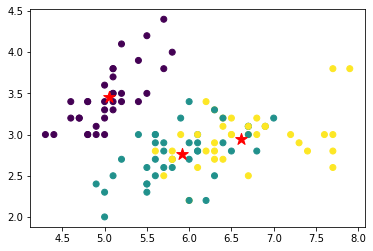

In [12]:
plt.scatter(X_train['sepal length (cm)'],X_train['sepal width (cm)'], c = y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')


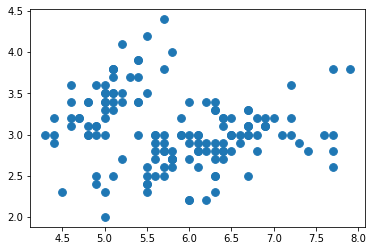

In [13]:
plt.scatter(data[:, 0], data[:, 1], cmap='autumn', s=60)

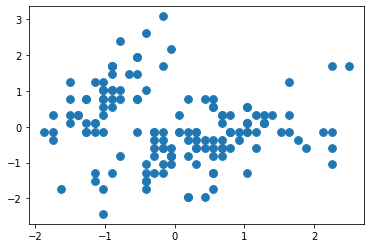

In [15]:
# приведение к единому масштабу и график масштабированных данных(0 и 1 столбцы массива)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1],cmap='autumn', s=60)

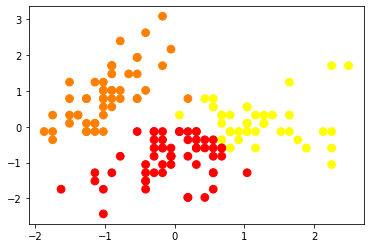

In [17]:
# около 2-3 кластеров
kmeans = KMeans(n_clusters=3) 
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [18]:
# график локтя
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

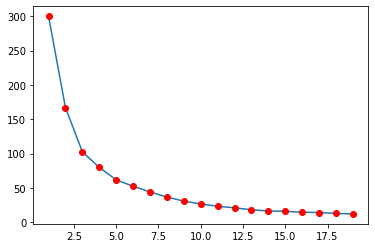

In [19]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')